## Decision Tree with cifar10

### Load Data

In [1]:
import numpy as np
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

2024-09-24 12:34:48.017535: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 12:34:48.277549: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 12:34:48.542170: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 12:34:48.743116: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 12:34:48.801198: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 12:34:49.243202: I tensorflow/core/platform/cpu_feature_gu

In [2]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

### Train/Test Split

In [3]:
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)

In [4]:
x_test_reshaped.shape, x_test_reshaped.shape

((10000, 3072), (10000, 3072))

### Normalization

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train_reshaped)
scaled_x_test = scaler.transform(x_test_reshaped)

In [6]:
scaled_x_train[0]

array([-0.97682401, -1.01575822, -0.86457067, ..., -0.05604997,
       -0.54031962, -0.6414024 ])

### Pick Samples

In [7]:
x_sample = scaled_x_train[:500]
y_sample = y_train[:500]

In [8]:
x_sample.shape, y_sample.shape

((500, 3072), (500, 1))

### Devide Data to 3 Cluters

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(x_sample)

KMeans(n_clusters=3)

### Save Model

In [10]:
import pickle

with open('k_means_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

In [22]:

with open('k_means_model.pkl', 'rb') as f:
    kmeans = pickle.load(f)

In [24]:
prediction = kmeans.predict(scaled_x_train)


In [43]:
import numpy as np
num_class = np.unique(prediction)
num_class

array([0, 1, 2], dtype=int32)

In [45]:
num_classes = len(np.unique(y_train))
num_classes

10

### Devide lables for each cluster

In [25]:
cluster_1_X = scaled_x_train[prediction == 0]
cluster_1_y = y_train[prediction == 0]

cluster_2_X = scaled_x_train[prediction == 1]
cluster_2_y = y_train[prediction == 1]

cluster_3_X = scaled_x_train[prediction == 2]
cluster_3_y = y_train[prediction == 2]

### Train Cluter 1 with SVM

In [14]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(cluster_1_X, cluster_1_y)


/home/hossein/UNI/MFT/Machine Learning/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

### Save Model

In [17]:
import pickle

with open('smv-model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

In [8]:
import pickle
with open('smv-model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

### Predict All Data with SVM Model

In [24]:
svm_1_pred = svm_model.predict(scaled_x_train)

### save prediction file

In [25]:
import pandas as pd
svm_model_prediction = pd.DataFrame(np.array([svm_1_pred]).T)
svm_model_prediction.to_csv("svm_model_prediction.csv")

svm_model_prediction.head()

,0
0,5
1,9
2,9
3,6
4,1


### Train Cluster 2 with Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(cluster_2_X, cluster_2_y)


/home/hossein/UNI/MFT/Machine Learning/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hossein/UNI/MFT/Machine Learning/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Save Model

In [18]:
with open('logistic_regression.pkl', 'wb') as f:
    pickle.dump(logistic_model, f)

In [21]:
with open('logistic_regression.pkl', 'rb') as f:
    logistic_model = pickle.load(f)

### Predict All Data with Logistic Regression Model

In [15]:
logestic_2_pred = logistic_model.predict(scaled_x_train)


In [16]:
logestic_2_pred

array([6, 1, 9, ..., 9, 9, 7], dtype=uint8)

### save prediction file

In [22]:
import pandas as pd
logestic_regression_model_prediction = pd.DataFrame(np.array([logestic_2_pred]).T)
logestic_regression_model_prediction.to_csv("logestic_regression_model_prediction.csv")

logestic_regression_model_prediction.head()

,0
0,6
1,1
2,9
3,6
4,8


### Train Cluster 3 with KNN Model

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_3= KNeighborsClassifier(n_neighbors=5)
knn_3.fit(cluster_3_X, cluster_3_y)

/home/hossein/UNI/MFT/Machine Learning/.venv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [27]:
with open('knn.pkl', 'wb') as f:
    pickle.dump(knn_3, f)

In [10]:
with open('knn.pkl', 'rb') as f:
    knn_3 = pickle.load(f)

### Predict All Data with Logistic KNN Model

In [29]:
knn_3_pred = knn_3.predict(scaled_x_train)

### save prediction file

In [30]:
import pandas as pd
knn_model_prediction = pd.DataFrame(np.array([knn_3_pred]).T)
knn_model_prediction.to_csv("knn_model_prediction.csv")

knn_model_prediction.head()

,0
0,4
1,8
2,8
3,4
4,8


In [11]:
import pandas as pd
svm_df = pd.read_csv('svm_model_prediction.csv')
svm_df = svm_df['0']
logistic_df = pd.read_csv('logestic_regression_model_prediction.csv')
logistic_df = logistic_df['0']
knn_df = pd.read_csv('knn_model_prediction.csv')
knn_df = knn_df['0']

svm_df.head()

0    5
1    9
2    9
3    6
4    1
Name: 0, dtype: int64

In [12]:
df = pd.concat([svm_df.rename('svm'), logistic_df.rename('logistic'), knn_df.rename('knn')], axis=1)

df.head()

,svm,logistic,knn
0,5,6,4
1,9,1,8
2,9,9,8
3,6,6,4
4,1,8,8


### Give All The Modes To Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
meta_model = DecisionTreeClassifier()
meta_model.fit(df, y_train)


DecisionTreeClassifier()

In [14]:
with open('logistic_regression.pkl', 'wb') as f:
    pickle.dump(meta_model, f)

In [25]:
svm_test_pred = svm_model.predict(scaled_x_test)


### save prediction file

In [26]:
svm_df_test_prediction = pd.DataFrame(np.array([svm_test_pred]).T)
svm_df_test_prediction.to_csv("svm_df_test_prediction.csv")

svm_df_test_prediction.head()

,0
0,3
1,8
2,8
3,0
4,2


In [36]:
svm_df_test_prediction = pd.read_csv('svm_df_test_prediction.csv')
svm_test_pred = svm_df_test_prediction['0']

svm_test_pred.head()

0    3
1    8
2    8
3    0
4    2
Name: 0, dtype: int64

In [27]:
logistic_regreion_test_pred = logistic_model.predict(scaled_x_test)

In [28]:
logestic_regression_test_prediction = pd.DataFrame(np.array([logistic_regreion_test_pred]).T)
logestic_regression_test_prediction.to_csv("logestic_regression_test_prediction.csv")

logestic_regression_test_prediction.head()

,0
0,6
1,9
2,0
3,8
4,4


In [29]:
knn_test_pred = knn_3.predict(scaled_x_test)


### save prediction file

In [30]:
knn_test_prediction = pd.DataFrame(np.array([knn_test_pred]).T)
knn_test_prediction.to_csv("knn_test_prediction.csv")

knn_test_prediction.head()

,0
0,2
1,8
2,8
3,8
4,2


In [37]:
x_pred_tree = np.c_[svm_test_pred,logistic_regreion_test_pred,knn_test_pred]
x_pred_tree.shape

(10000, 3)

In [39]:
meta_model_pred = meta_model.predict(x_pred_tree)
meta_model_pred_proba = meta_model.predict_proba(x_pred_tree)

/home/hossein/UNI/MFT/Machine Learning/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/hossein/UNI/MFT/Machine Learning/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [41]:
meta_model_pred
meta_model_pred_proba

array([[0.        , 0.0173913 , 0.12173913, ..., 0.06956522, 0.02608696,
        0.03478261],
       [0.08276534, 0.04479065, 0.01071081, ..., 0.01655307, 0.75851996,
        0.04089581],
       [0.16763848, 0.01895044, 0.02478134, ..., 0.00728863, 0.7303207 ,
        0.01457726],
       ...,
       [0.08196721, 0.03278689, 0.33606557, ..., 0.03278689, 0.        ,
        0.14754098],
       [0.0625    , 0.15625   , 0.07291667, ..., 0.0625    , 0.01041667,
        0.11458333],
       [0.01712329, 0.01027397, 0.1130137 , ..., 0.31506849, 0.00684932,
        0.01712329]])

### Draw ROC Curve for Modes

In [76]:
print(meta_model_pred.reshape(1,-1))

[[3 8 8 ... 2 5 4]]


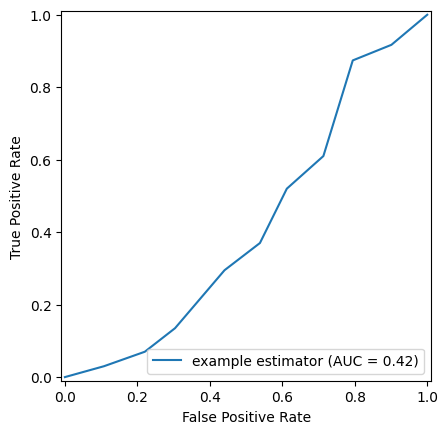

In [81]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, RocCurveDisplay


fprate, tprate, thresholds = roc_curve(y_test, meta_model_pred, pos_label=2)

roc_auc = auc(fprate, tprate)

display = RocCurveDisplay(fpr=fprate, tpr=tprate, roc_auc=roc_auc,estimator_name='example estimator')
display.plot()
plt.show()
